In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('car_details.csv') #read the csv file into the python environment as a pandas dataFrame

In [3]:
df.head() #returns first 5 rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,640Nm@ 1740rpm,4.0
1,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5,2987.0,282.0,490Nm@ 1600rpm,5.0
2,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,347Nm@ 4300rpm,5.0
3,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,347Nm@ 4300rpm,5.0
4,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,347Nm@ 4300rpm,5.0


In [4]:
df.tail() #return the last 5 rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
8124,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8125,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8126,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
8127,Maruti Swift 1.3 VXi,2006,130000,100000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
#shape of the dataset
print(f'- {df.shape[0]} rows') #returns the number of rows in the dataset
print(f'- {df.shape[1]} columns') #returns the number of columns in the dataset

- 8128 rows
- 13 columns


In [ ]:
#summary statistics
df.info() #returns column names, non-null count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [ ]:
#descriptive statistics of the datset 
df.describe(include='all').T

In [ ]:
#selecting categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns #returns categorical columns only
numerical_cols = df.select_dtypes(include='number').columns #returns numerical columns only

In [ ]:
cols = [col for col in categorical_cols] #a list comprehension, making a list of categorical columns
print(f'This dataset has {len(cols)} categorical columns - {cols}') #returns the number of categorical columns

This dataset has 6 categorical columns - ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']


In [ ]:
for cols in categorical_cols: #loop through categorical columns
    print(f' - {cols} : {df[cols].unique()} - {df[cols].nunique()}\n') #returns column names, unique values and number of unique values

 - name : ['Volvo XC90 T8 Excellence BSIV' 'Mercedes-Benz S-Class S 350 CDI'
 'Jeep Wrangler 2016-2019 3.6 4X4' ... 'Hyundai Santro Xing ABS'
 'Hyundai Santro Xing XO' 'Hyundai Accent Gvs'] - 2058

 - fuel : ['Petrol' 'Diesel' 'CNG' 'LPG'] - 4

 - seller_type : ['Individual' 'Dealer' 'Trustmark Dealer'] - 3

 - transmission : ['Automatic' 'Manual'] - 2

 - owner : ['First Owner' 'Third Owner' 'Second Owner' 'Fourth & Above Owner'
 'Test Drive Car'] - 5

 - torque : ['640Nm@ 1740rpm' '490Nm@ 1600rpm' '347Nm@ 4300rpm' '355Nm@ 4500rpm'
 '600Nm@ 2000rpm' '620Nm@ 1500-2500rpm' '620Nm@ 2000-2500rpm'
 '560Nm@ 1500rpm' '619Nm@ 1600-2400rpm' '620Nm@ 1600-2400rpm'
 '580Nm@ 1400-3250rpm' '550Nm@ 1750-2750rpm' '540Nm@ 2000rpm'
 '51@ 1,750-3,000(kgm@ rpm)' '53@ 2,000-2,750(kgm@ rpm)' '480Nm'
 '510Nm@ 1600-2800rpm' '196Nm@ 5000rpm' '450Nm@ 1750-2500rpm'
 '202Nm@ 3600-5200rpm' '245Nm@ 5000rpm' '500Nm@ 1600-1800rpm'
 '46.5@ 1,400-2,800(kgm@ rpm)' '250Nm@ 4250rpm' '500Nm@ 2000rpm'
 '470Nm@ 1750-2500rpm

In [ ]:
#cleaning the torque column
print(df['torque'])

0       640Nm@ 1740rpm
1       490Nm@ 1600rpm
2       347Nm@ 4300rpm
3       347Nm@ 4300rpm
4       347Nm@ 4300rpm
             ...      
8123               NaN
8124               NaN
8125               NaN
8126               NaN
8127               NaN
Name: torque, Length: 8128, dtype: object


In [ ]:
torque_split = df['torque'].str.split('@',expand=True) #splits the torque column at @, expand function splits it into a dataframe and not a list
df['torque_value'] = torque_split[0] #assigns the value at the first index to torque value
df['torque_rpm'] = torque_split[1] #assigns the value at the second index to torque rpm

In [ ]:
df['torque_value'] = df['torque_value'].str.replace(r'[^0-9\.\-]','',regex=True) #removes all characters that are not numbers, fullstop or a dash
df.fillna({'torque_value': 0},inplace=True) #fills missing values with zero in the torque value column

In [ ]:
df['torque_rpm'] = df['torque_rpm'].str.replace(r'[^0-9\.\-]','',regex=True) # removes all characters that are not numbers, fullstop or a dash
df.fillna({'torque_rpm' : 0},inplace=True) #fills missing values with zero in the torque rpm column

In [ ]:
torque_rpm_split = df['torque_rpm'].str.split('-',expand=True) #splits the torque rpm column at '-',expands into a dataframe with two separate columns
df['min_torque_rpm'] = torque_rpm_split[0] #assigns the value at the first index to min torque rpm
df['max_torque_rpm'] = torque_rpm_split[1] #assigns the value at the second index to max torque rpm

In [ ]:
#data type conversion
df['min_torque_rpm'] = df['min_torque_rpm'].astype(float) #converts the object dtype to float
df['max_torque_rpm'] = df['max_torque_rpm'].astype(float) 

In [ ]:
df['average_rpm'] = df[['min_torque_rpm','max_torque_rpm']].mean(axis=1,skipna=True) # calculates and returns the average of the columns listed and assigned to the average rpm column

In [ ]:
cols_to_drop = ['torque','torque_rpm','min_torque_rpm','max_torque_rpm'] #columns to drop
df.drop(columns=cols_to_drop,inplace=True) #drop columns using the 'drop' function

In [ ]:
cols = [col for col in numerical_cols] # a list comprehension, creating a list of numerical columns
print(f'This dataset has {len(cols)} numerical columns - {cols}') #returns the number of numerical columns

This dataset has 7 numerical columns - ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


In [ ]:
for cols in numerical_cols: #loops through columns
    print(f'- {cols:<14}   - Min value: {df[cols].min():<12}   - Max value: {df[cols].max()}') #returns column name, minimum value and maximum value

- year             - Min value: 1983           - Max value: 2020
- selling_price    - Min value: 29999          - Max value: 10000000
- km_driven        - Min value: 1              - Max value: 2360457
- mileage          - Min value: 0.0            - Max value: 42.0
- engine           - Min value: 624.0          - Max value: 3604.0
- max_power        - Min value: 0.0            - Max value: 400.0
- seats            - Min value: 2.0            - Max value: 14.0


Definition of Columns
- name - The model name of the car
- fuel - The type of fuel used
- seller type - Who's selling the car
- transmission - The gear system of the car
- owner - Ownership history
- torque - rotational force of the engine
- year - The manufacturing year of the car
- selling_price - The selling price of the car
- km_driven - The number of kilometres the car has been driven
- mileage - the efficiency of the fuel
- engine - engine displacement
- max_power - maximum power output of the engine
- seats - number of seats available in the car

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False) #sums up all the missing values for each column and sorts them in descending order
missing_pct = missing / len(df) * 100 #calculates the missing values as a percentage of the rows in the dataset
miss = pd.DataFrame({
    'missing values' :missing,
    'Missing Pct': missing_pct
}) #creates a dataframe with two columns, missing values and missing values percentage
print(miss)

               missing values  Missing Pct
average_rpm               487     5.991634
engine                    221     2.718996
mileage                   221     2.718996
seats                     221     2.718996
max_power                 216     2.657480
name                        0     0.000000
seller_type                 0     0.000000
fuel                        0     0.000000
km_driven                   0     0.000000
selling_price               0     0.000000
year                        0     0.000000
owner                       0     0.000000
transmission                0     0.000000
torque_value                0     0.000000


In [ ]:
df[df.duplicated(keep='first')] #returns duplicated rows, keeping only the first occurence

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,average_rpm
3,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,5.0,347,4300.0
4,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,5.0,347,4300.0
5,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,5.0,347,4300.0
6,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,5.0,347,4300.0
7,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604.0,280.0,5.0,347,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,Maruti Swift VDI BSIV,2017,525000,38000,Diesel,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,0,NaN
8114,Maruti Esteem Lxi,2002,95000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,0,NaN
8116,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,0,NaN
8119,Hyundai Santro Xing XL eRLX Euro II,2006,105000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
df.drop_duplicates(keep='first',inplace=True) #drops all duplicated rows, keeping only the first occurence

In [ ]:
for cols in numerical_cols: #loops the 
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = ((df[cols] < lower_fence) | (df[cols] > upper_fence))

    df = df[~outliers]

In [26]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,average_rpm
1242,Ford Ecosport 1.5 Petrol Ambiente,2018,640000,6001,Petrol,Dealer,Manual,First Owner,15.90,1496.0,120.69,5.0,149,4500.0
1243,Ford Ecosport 1.5 Petrol Titanium,2016,599000,39000,Petrol,Dealer,Manual,First Owner,15.90,1496.0,120.69,5.0,149,4500.0
1378,Hyundai Venue SX Plus Turbo DCT BSIV,2019,1125000,3500,Petrol,Dealer,Automatic,First Owner,18.15,998.0,118.35,5.0,171.6,2750.0
1380,Hyundai Venue SX Plus Dual Tone Turbo DCT,2019,1150000,2286,Petrol,Trustmark Dealer,Automatic,First Owner,18.15,998.0,118.35,5.0,171.6,2750.0
1387,Honda City 1.5 S MT,2009,345000,47000,Petrol,Individual,Manual,Second Owner,17.00,1497.0,118.00,5.0,1464800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Omni E 8 Str STD,2008,125000,70000,Petrol,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,0,NaN
8122,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,0,NaN
8125,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,0,NaN
8126,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,0,NaN


In [27]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = missing / len(df) * 100
miss = pd.DataFrame({
    'missing values' :missing,
    'Missing Pct': missing_pct
})
print(miss)

               missing values  Missing Pct
average_rpm               311     6.428276
engine                    181     3.741215
mileage                   181     3.741215
max_power                 181     3.741215
seats                     181     3.741215
name                        0     0.000000
seller_type                 0     0.000000
fuel                        0     0.000000
km_driven                   0     0.000000
selling_price               0     0.000000
year                        0     0.000000
owner                       0     0.000000
transmission                0     0.000000
torque_value                0     0.000000


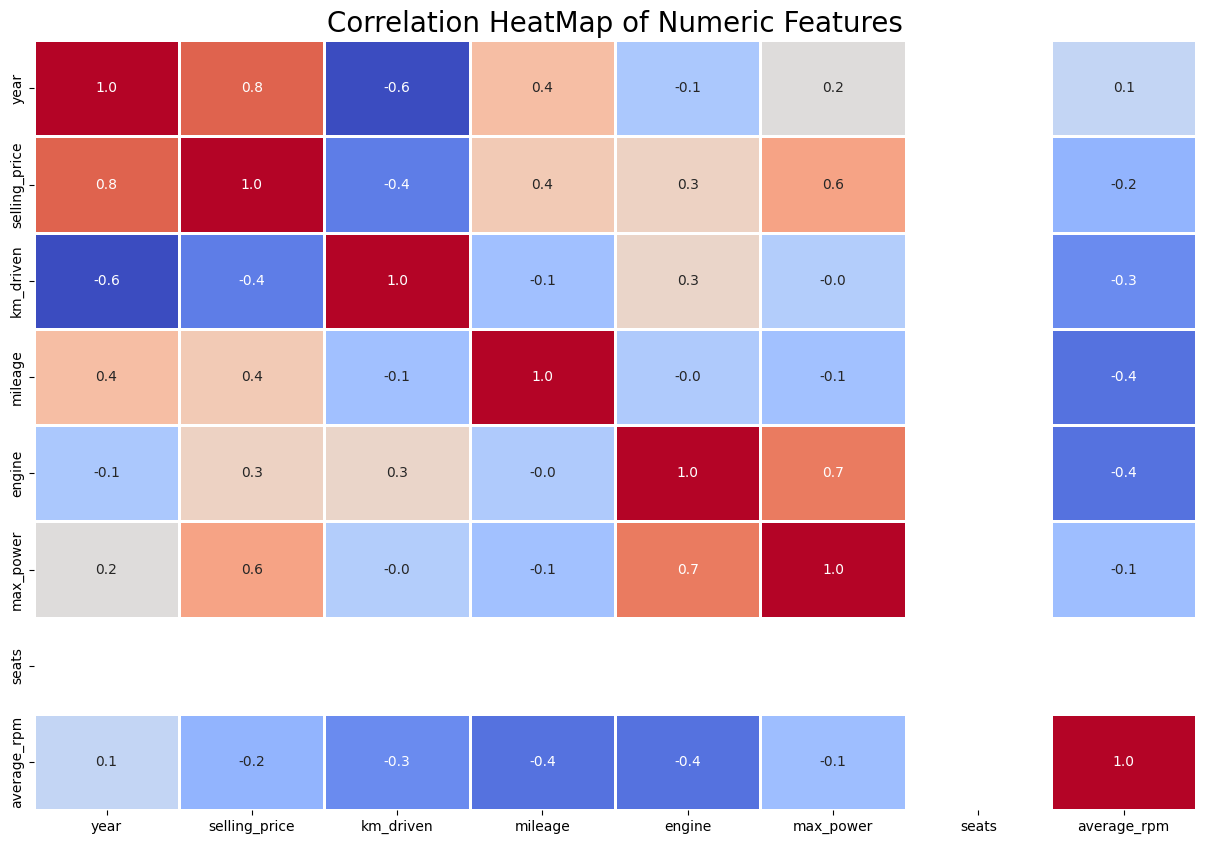

In [28]:
# +1: strong positive correlation (as one increases, the other increases)
# -1: strong negative correlation (as one increases, the other decreases)
# 0: no correlation

corr = df.corr(method='spearman',numeric_only=True)
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data=corr,cmap='coolwarm',annot=True,linewidths=1,fmt='.1f',cbar=False)
plt.title('Correlation HeatMap of Numeric Features',fontsize = 20)
plt.show()

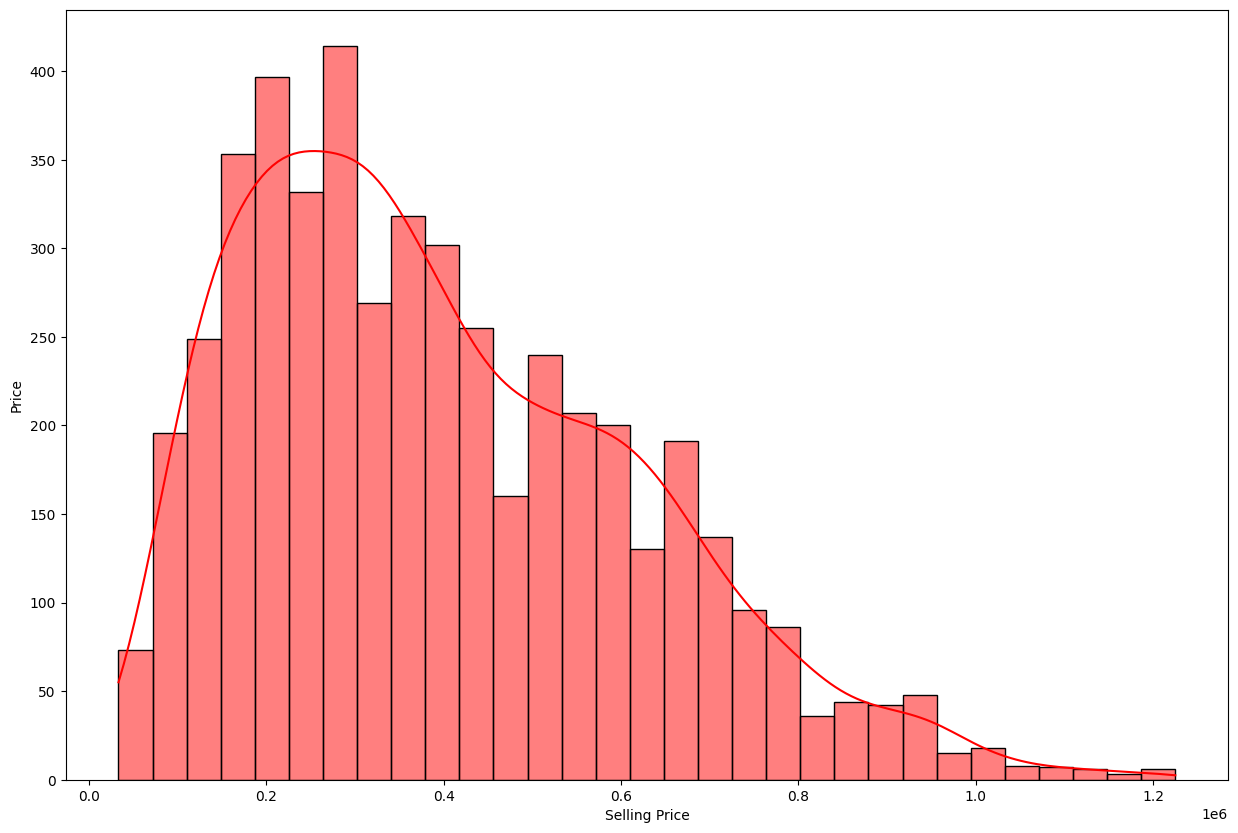

In [29]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x='selling_price',kde=True,color='red')
plt.xlabel('Selling Price')
plt.ylabel('Price')
plt.show()

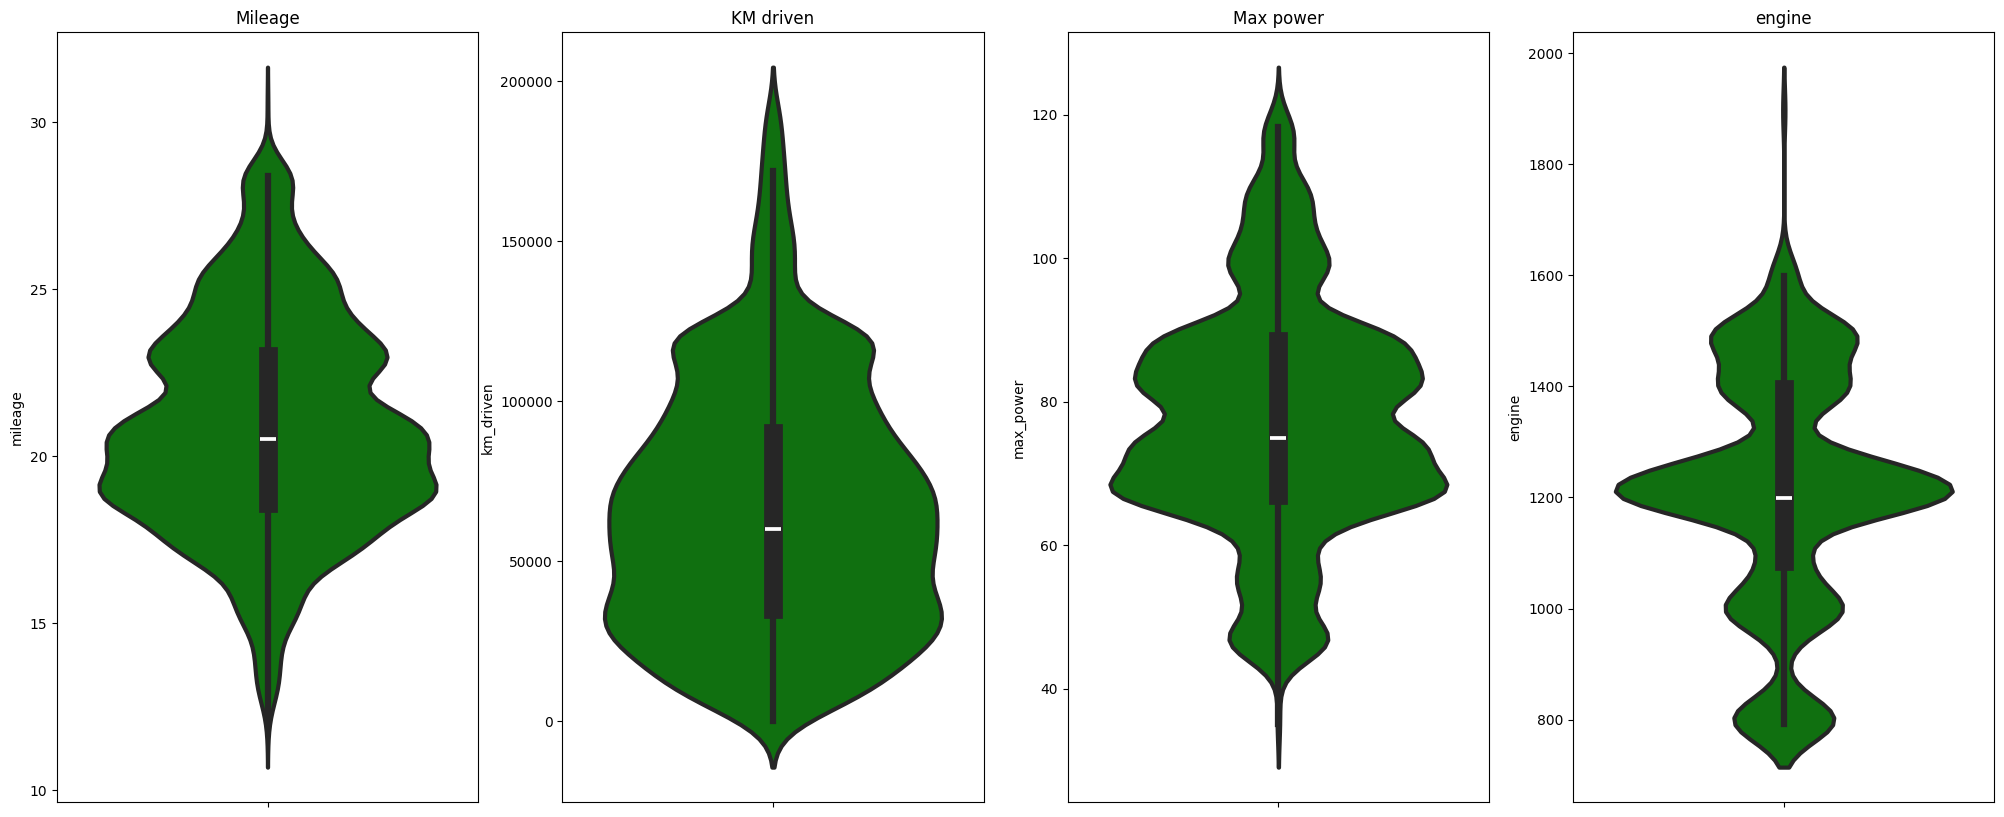

In [31]:
plt.subplots(1,4,figsize=(25,10))
plt.subplot(141)
sns.violinplot(data=df,y='mileage',color='green',linewidth=3)
plt.title('Mileage')

plt.subplot(142)
sns.violinplot(data=df,y='km_driven',color='green',linewidth=3)
plt.title('KM driven')

plt.subplot(143)
sns.violinplot(data=df,y='max_power',color='green',linewidth=3)
plt.title('Max power')

plt.subplot(144)
sns.violinplot(data=df,y='engine',color='green',linewidth=3)
plt.title('engine')
plt.show()


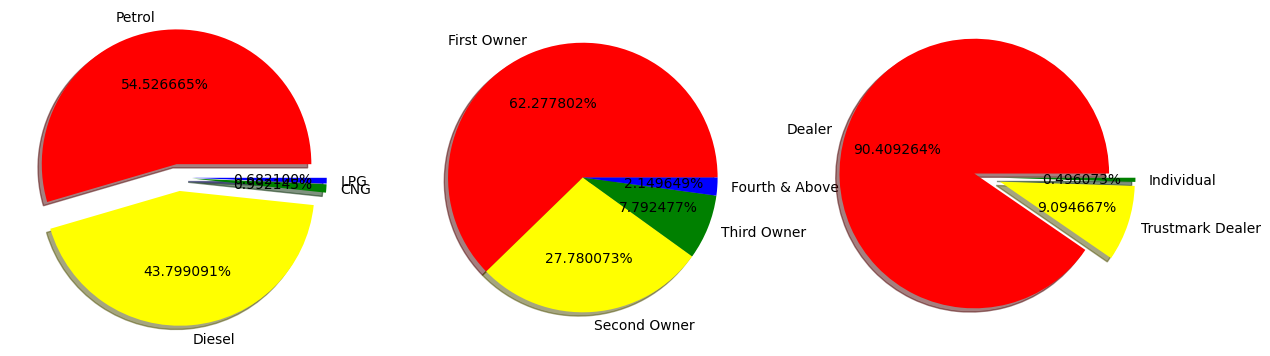

In [ ]:
plt.rcParams['figure.figsize'] =(20,10)
plt.subplot(1,4,1)
size = df['fuel'].value_counts()
labels = df['fuel'].unique()
colors = ['red','yellow','green','blue']
plt.pie(size,labels=labels,colors=colors, autopct='%2f%%',shadow=True,explode=[0.1,0.1,0.1,0.1])

plt.subplot(1,4,2)
size = df['owner'].value_counts()
labels = df['owner'].unique()
colors = ['red','yellow','green','blue','pink']
plt.pie(size,labels=labels,colors=colors, autopct='%2f%%',shadow=True)

plt.subplot(1,4,3)
size = df['seller_type'].value_counts()
labels = df['seller_type'].unique()
colors = ['red','yellow','green','blue']
plt.pie(size,labels=labels,colors=colors, autopct='%2f%%',shadow=True,explode=[0.1,0.1,0.1])

plt.subplot(1,4,4)
size = df['transmission'].value_counts()
labels = df['transmission'].unique()
colors = ['yellow','green','blue']
plt.pie(size,labels=labels,colors=colors, autopct='.%2f%%',shadow=True,explode=[0.1,0.1,0.1,0.1])
plt.show()